In [3]:
import matplotlib.pyplot as plt
from glob import glob
from deepforest import main
import cv2
import os

In [10]:
forest = 'forest2'

In [14]:
vidcap = cv2.VideoCapture('./{}/forest.mp4'.format(forest))
success,image = vidcap.read()
count = 0
os.mkdir('./{}/frames'.format(forest))
while success:
  cv2.imwrite("./{}/frames/frame{}.jpg".format(forest, count), image)     # save frame as JPEG file      
  success,image = vidcap.read()
  count += 1

In [12]:
stitcher = cv2.Stitcher_create()
# stitcher.setRegistrationResol(-1)
# stitcher.setSeamEstimationResol(-1)
# stitcher.setCompositingResol(-1)
# stitcher.setPanoConfidenceThresh(-1)
# stitcher.setWaveCorrection(True)

images = []
for i in range(110, 210, 20):
    images.append(cv2.imread('./{}/frames/frame'.format(forest) + str(i) + '.jpg'))
result = stitcher.stitch(images)
print(result[0])

cv2.imwrite('./{}/stitch.jpg'.format(forest), result[1])

3


error: OpenCV(4.5.4-dev) /Users/runner/work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp:799: error: (-215:Assertion failed) !_img.empty() in function 'imwrite'


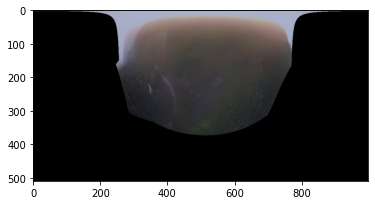

In [ ]:
plt.imshow(cv2.cvtColor(result[1], cv2.COLOR_BGR2RGB))

Reading config file: /usr/local/lib/python3.9/site-packages/deepforest/data/deepforest_config.yml
Model from DeepForest release https://github.com/weecology/DeepForest/releases/tag/1.0.0 was already downloaded. Loading model from file.
Loading pre-built model: https://github.com/weecology/DeepForest/releases/tag/1.0.0


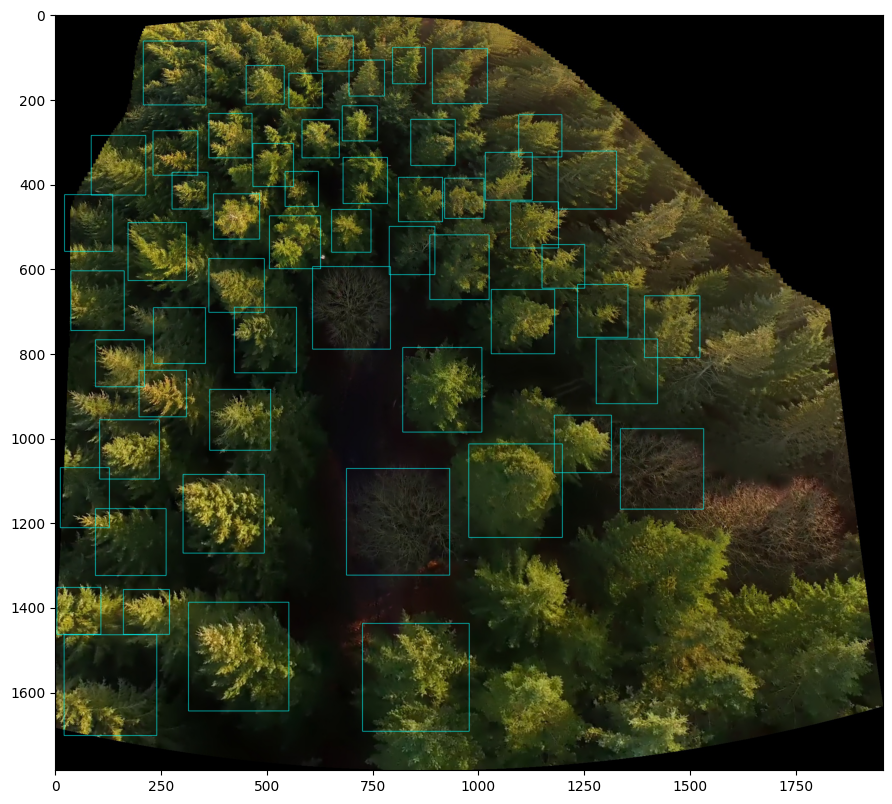

In [18]:
model = main.deepforest()
model.use_release()

plt.figure(figsize=(15, 10), dpi=100)
img = model.predict_image(path="./forest2/stitch.jpg", return_plot=True)

#predict_image returns plot in BlueGreenRed (opencv style), but matplotlib likes RedGreenBlue, switch the channel order.
plt.imshow(img[:,:,::-1])
plt.show()